In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv('../runs/results_chawin.csv')
df = pd.read_csv('../runs/results.csv')
df = df.replace({'apply_patch': 'True', 'random_patch': 'True'}, 1)
df = df.replace({'apply_patch': 'False', 'random_patch': 'False'}, 0)
for col in ['apply_patch', 'random_patch']:
    df[col] = df[col].astype(float).astype(bool)

# df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'generate_patch']]
df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'no_transform', 'no_relighting']].tail(5)

,fnr_octagon,num_octagon_labels,num_octagon_with_patch,fn_octagon,apply_patch,no_transform,no_relighting
38,0.438108,0.0,571.0,388.0,True,False,False
39,0.323760,0.0,571.0,287.0,True,False,True
40,0.206545,0.0,0.0,183.0,False,NaN,NaN
41,0.378268,0.0,571.0,335.0,True,False,False
42,0.396309,0.0,571.0,351.0,True,False,False


In [3]:
# df_results_per_image = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_37/results_per_image.csv')
# np.sum(df_results_per_image[df_results_per_image['fn'] > 0]['fn'])

In [57]:
# f = open('../runs/val/exp/bg_filenames.txt', 'r')
# lines = f.readlines()
# bg_filenames = [x.strip('\n') for x in lines]
# print(bg_filenames)

df_results_per_label_no_patch = pd.read_csv('../runs/val/exp_mapillary_no_patch_1/results_per_label.csv')
df_results_per_label_rp2_patch = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_37/results_per_label.csv')

merged_df = df_results_per_label_no_patch.merge(df_results_per_label_rp2_patch, on=['filename', 'obj_id', 'sign_width', 'sign_height'], suffixes=['_no_patch', '_patch'])
assert len(merged_df) == len(df_results_per_label_rp2_patch) & len(merged_df) == len(df_results_per_label_no_patch)

merged_df = merged_df[merged_df['correct_prediction_no_patch'] == 1]
merged_df = merged_df[merged_df['num_patches_applied_to_image_patch'] > 0]

merged_df['success_rate'] = merged_df['correct_prediction_no_patch'] - merged_df['correct_prediction_patch']
merged_df = merged_df.sort_values(by=['success_rate', 'filename'], ascending=[False, True])
merged_df
# successful_attack_filenames = set(merged_df[merged_df['change_in_fn'] > 0]['filename'])
# len(successful_attack_filenames_2)

# merged_df[merged_df['filename'].isin(bg_filenames)]

merged_df['avg_sign_dim'] = (merged_df['sign_width'] + merged_df['sign_height'])/2
merged_df

,filename,obj_id,label_no_patch,correct_prediction_no_patch,sign_width,sign_height,confidence_no_patch,num_patches_applied_to_image_no_patch,label_patch,correct_prediction_patch,confidence_patch,num_patches_applied_to_image_patch,success_rate,avg_sign_dim
608,-9KGl9SjjCNY1k7e7kZAQw.jpg,2.0,14.0,1,53.749996,68.749969,0.891516,0.0,14.0,0,0.132326,1.0,1,61.249983
614,-LtOhSguWQXyerbzUN6HpA.jpg,5.0,14.0,1,60.784359,56.862732,0.918845,0.0,14.0,0,0.234044,1.0,1,58.823545
613,-YF7yrS0WkRqW2CUBmSOtw.jpg,0.0,14.0,1,34.056274,34.056244,0.849954,0.0,14.0,0,0.156626,1.0,1,34.056259
130,-gSMw1gvzaUryheHPx00Zw.jpg,5.0,14.0,1,9.166687,26.388916,0.777415,0.0,14.0,0,0.246458,1.0,1,17.777802
127,04_G_l3AleUQWBSJ4_R8Hw.jpg,2.0,14.0,1,24.666655,118.000000,0.700801,0.0,14.0,0,0.142067,1.0,1,71.333327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,yV_1a9GKPY1hdEiL69uBVQ.jpg,0.0,14.0,1,51.372498,50.588257,0.881369,0.0,14.0,1,0.441367,1.0,0,50.980377
358,yvZ-yQY87UUI4HmYeak0vQ.jpg,2.0,14.0,1,67.058838,75.294128,0.925700,0.0,14.0,1,0.688192,1.0,0,71.176483
357,z3xp88xBjag_KwsMglNZyw.jpg,3.0,14.0,1,55.000000,55.624969,0.905129,0.0,14.0,1,0.451955,1.0,0,55.312485
352,zTOpBElZV7sYDKSdAITHHw.jpg,0.0,14.0,1,62.352909,56.078430,0.911784,0.0,14.0,1,0.718885,1.0,0,59.215670


In [41]:
# # checking results per label are correct
# df_results_per_image = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_37/results_per_image.csv')
# print(np.sum(df_results_per_image['fn']))

# print(len(df_results_per_label_rp2_patch) - np.sum(df_results_per_label_rp2_patch['correct_prediction']))


In [47]:
print('patch success rate: ', np.round(np.sum(merged_df['success_rate'])/571, 3))

patch success rate:  0.359


(0.0, 1.0)

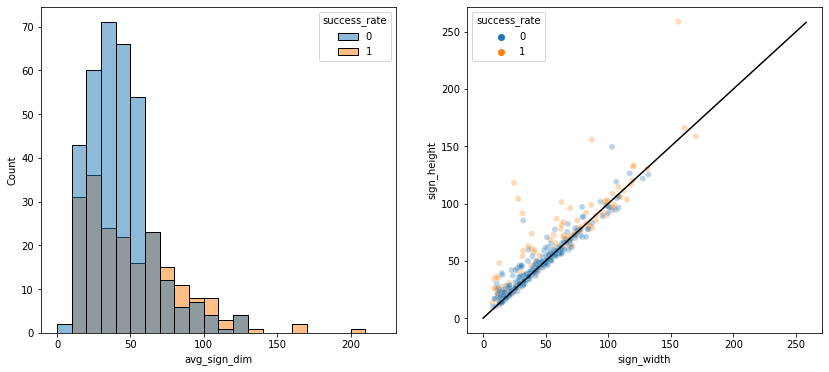

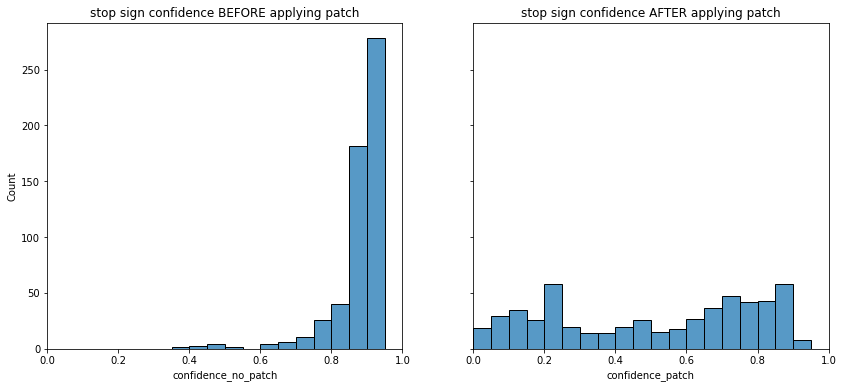

In [54]:
f, ax = plt.subplots(1, 2)
f.set_figheight(6)
f.set_figwidth(14)

bins = np.arange(0, 226, 10)
sns.histplot(data=merged_df[merged_df['success_rate'] >= 0], x="avg_sign_dim", hue='success_rate', bins=bins, ax=ax[0])
sns.scatterplot(x='sign_width', y='sign_height', data=merged_df[merged_df['success_rate'] >= 0], hue='success_rate', alpha=0.3, ax=ax[1])
ax[1].plot(np.arange(0, max(merged_df[merged_df['success_rate'] >= 0]['sign_height'])), np.arange(0, max(merged_df[merged_df['success_rate'] >= 0]['sign_height'])), color='black')

f, ax = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(14)
ax[0].set_title('stop sign confidence BEFORE applying patch')
ax[1].set_title('stop sign confidence AFTER applying patch')
bins=np.arange(0, 1.01, 0.05)
# sns.histplot(data=df_results_per_label_no_patch, x="confidence", ax=ax[0], bins=bins)
sns.histplot(data=merged_df, x="confidence_no_patch", ax=ax[0], bins=bins)
sns.histplot(data=merged_df, x="confidence_patch", ax=ax[1], bins=bins)

ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)

In [12]:
successful_attack_filenames = set(merged_df[merged_df['fn'] > 0]['filename'])
len(successful_attack_filenames)

with open('../runs/successful_attack_filenames.txt', 'w') as f:
    for line in successful_attack_filenames:
        f.write(line)
        f.write('\n')
